<a href="https://colab.research.google.com/github/2Svenkatesh/Data-science/blob/main/car_purchasing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.losses import MeanSquaredError

In [3]:
df=pd.read_csv("/content/car_purchasing.csv",encoding='ISO-8859-1')

In [4]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [6]:
df.isna().sum()

,0
customer name,0
customer e-mail,0
country,0
gender,0
age,0
annual Salary,0
credit card debt,0
net worth,0
car purchase amount,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.nunique()

,0
customer name,498
customer e-mail,500
country,211
gender,2
age,500
annual Salary,500
credit card debt,500
net worth,500
car purchase amount,500


In [9]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


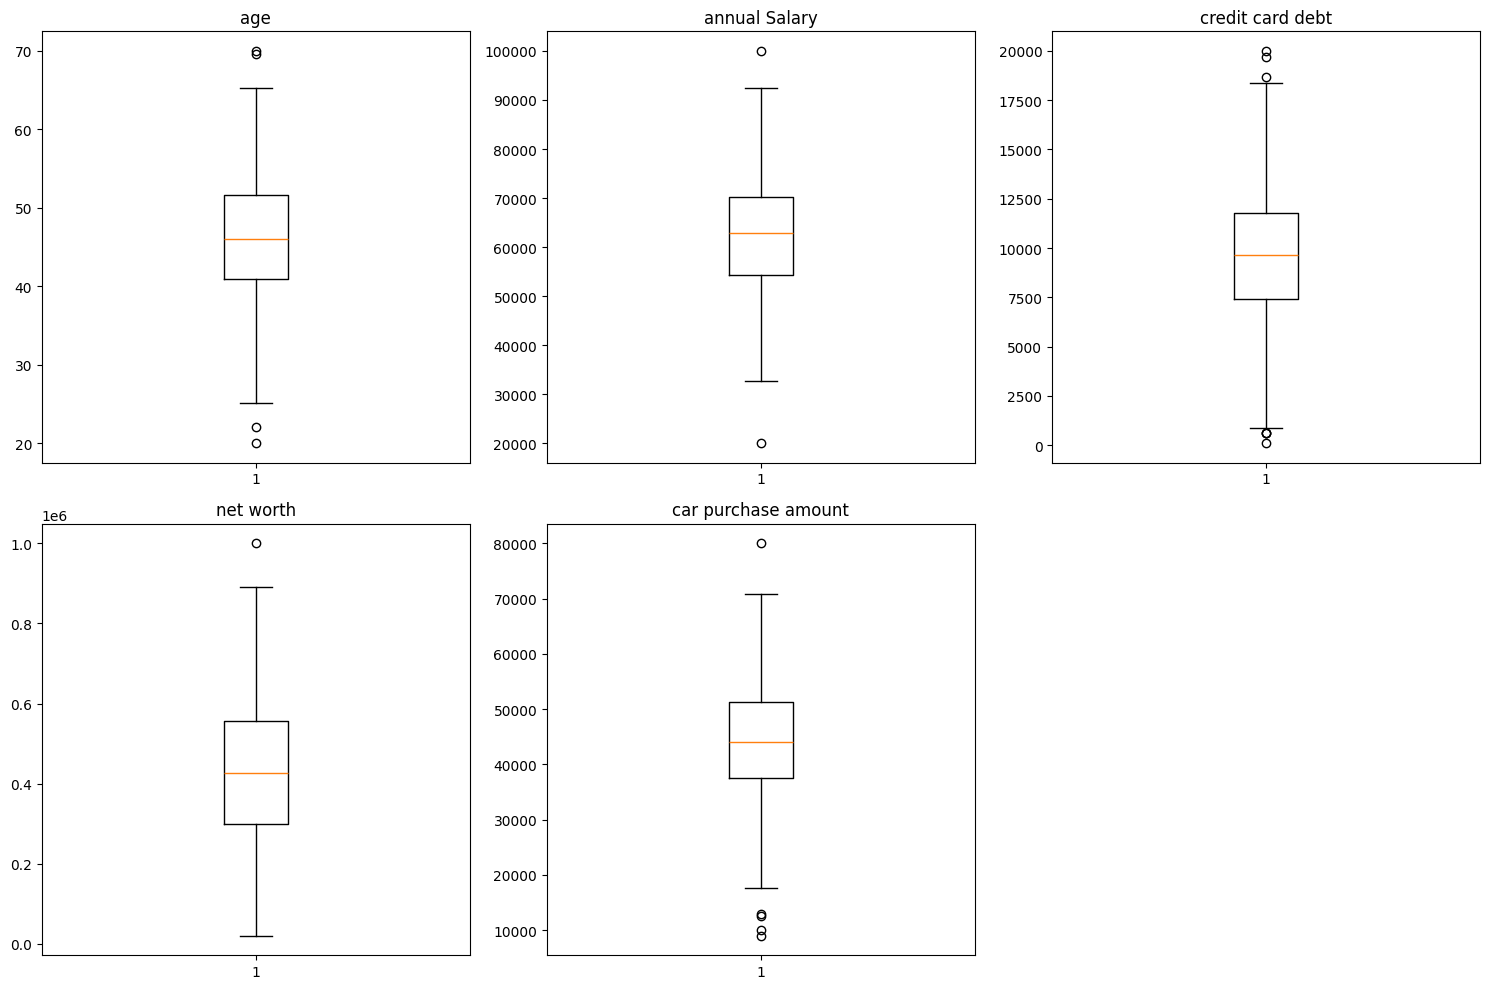

In [10]:
##check outliers
plt.figure(figsize=(15,10))
numeric_columns=["age",	"annual Salary","credit card debt",	"net worth","car purchase amount"]
for i in numeric_columns:
    plt.subplot(2,3,numeric_columns.index(i)+1)
    plt.boxplot(df[i])
    plt.title(i)
plt.tight_layout()
plt.show()

In [11]:
df.drop(columns=["customer name","customer e-mail","country"],inplace=True)

In [12]:
df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [13]:
x=df.drop(columns=["car purchase amount"])
y=df["car purchase amount"]

In [14]:
x.head()

,gender,age,annual Salary,credit card debt,net worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [15]:
y.head()

,car purchase amount
0,35321.45877
1,45115.52566
2,42925.70921
3,67422.36313
4,55915.46248


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [18]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [19]:
m=MinMaxScaler()
x_train=m.fit_transform(x_train)
x_test=m.transform(x_test)
x_val=m.transform(x_val)

In [25]:
model  = Sequential(
    [
        Dense(16, input_dim=x_train.shape[1], activation='relu'),
        Dense(8, activation='relu'),
        Dense(4, activation='relu'),
        Dense(1, activation='linear')
    ]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='MeanSquaredError')

In [28]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15, batch_size=4)

Epoch 1/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1456283136.0000 - val_loss: 27915286.0000
Epoch 2/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51077412.0000 - val_loss: 21009232.0000
Epoch 3/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31984502.0000 - val_loss: 15542306.0000
Epoch 4/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 18747742.0000 - val_loss: 10241152.0000
Epoch 5/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 11108764.0000 - val_loss: 8246809.5000
Epoch 6/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7197661.0000 - val_loss: 3161520.0000
Epoch 7/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3590876.5000 - val_loss: 2891380.0000
Epoch 8/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1372971.0000 - val_loss: 679500.9375
Epoch 9/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 413521.6250 - val_loss: 150018.4219
Epoch 10/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 89133.5391 - val_loss: 30620.8613
Epoch 11/15
1

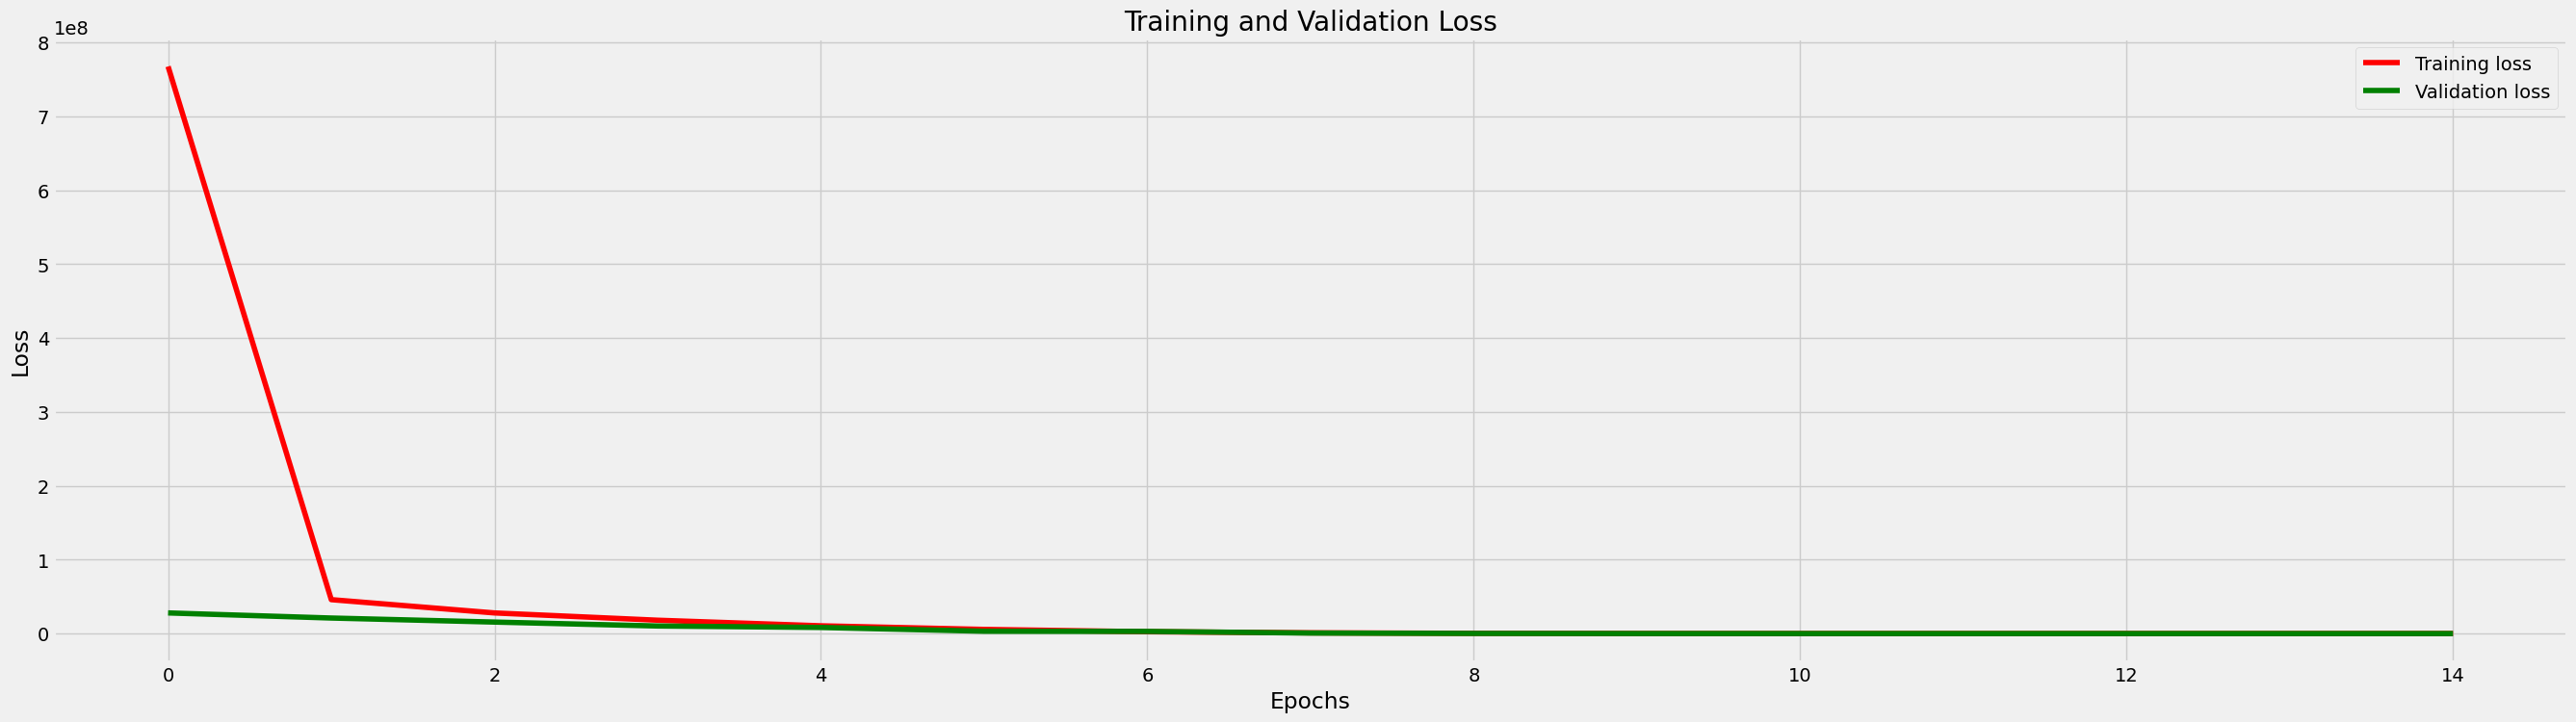

In [29]:
plt.figure(figsize= (30, 8))
plt.style.use('fivethirtyeight')

plt.plot(history.history['loss'], 'r', label= 'Training loss')
plt.plot(history.history['val_loss'], 'g', label= 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()